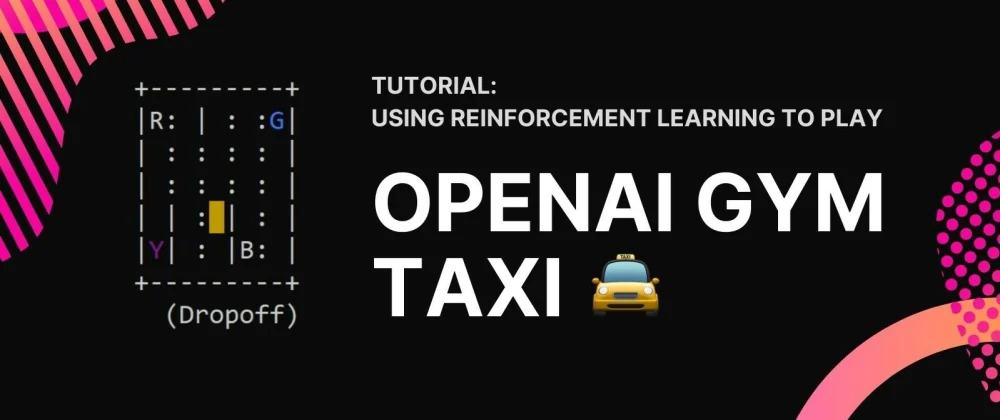

<div style="border-radius:10px; padding: 15px; background-color:#f774b8; font-size:120%; text-align:left">

<h3 align="left"><font color=black>Problem:</font></h3>

<h8 align="left"><font color=black>In this project, we aim to solve the problem of finding the optimal policy for a taxi agent in a grid environment. The agent needs to navigate the grid, pick up a passenger, and drop them off at their destination while maximizing the reward and minimizing the travel time.</font></h8>

<h3 align="left"><font color=black>Solution Approach:</font></h3>

<h8 align="left"><font color=black>We will apply the Q_Learning algorithm to train the taxi agent. Q_Learning is a reinforcement learning algorithm that helps the agent learn an optimal action-selection policy through exploration and exploitation, by learning from the rewards it receives during interactions with the environment. The goal is to maximize the agent's cumulative reward by choosing the best actions in each state, leading to efficient pick up and drop off routes for the taxi.</font></h8>

<h3 align="left"><font color=black>Key Components:</font></h3>

<ul>
  <li><b>State Space:</b> The state space consists of the taxi's current position, the passenger's location, and the destination.</li>
  <li><b>Action Space:</b> The actions are the possible movements the taxi can make )move north, south, east, west, pick up or drop off the passenger).</li>
  <li><b>Rewards:</b> The taxi receives positive rewards for successful pick up and drop off actions, and negative rewards for unnecessary movements or incorrect actions.</li>
  <li><b>Q-Table:</b> The Q-table stores the expected rewards for each state-action pair, guiding the agent in choosing the most beneficial actions.</li>
</ul>

<h3 align="left"><font color=black>Objective:</font></h3>

<h8 align="left"><font color=black>By the end of the training, the **Q_Learning** algorithm will enable the agent to navigate the grid efficiently, making decisions that maximize the total cumulative reward by picking up and dropping off the passengers in the least possible time and avoiding unnecessary actions.</font></h8>

</div>


<a id="import"></a>
# <p style="background-color:#f774b8; font-family:calibri; font-size:130%; color:balck; text-align:center; border-radius:40px 50px; padding:10px">Step 1: Import Libraries</p>

⬆️[Tabel of Contents](#contents_tabel)

In [64]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import gymnasium as gym
import time

<a id="import"></a>
# <p style="background-color:#f774b8; font-family:calibri; font-size:130%; color:balck; text-align:center; border-radius:40px 50px; padding:10px">Step 2: Create Environment</p>

⬆️[Tabel of Contents](#contents_tabel)

In [65]:
environment=gym.make("Taxi-v3",render_mode="rgb_array").env

environment.reset()

img = plt.imshow(environment.render()) 

print("Number of State:",environment.observation_space.n,"\n"
      "Number of actions:",environment.action_space.n)

Number of State: 500 
Number of actions: 6


<div style="border-radius:10px; padding: 15px; background-color: #f774b8; font-size:110%; text-align:left">

<h2 align="left"><font color=black>Explanation about the environment:</font></h2>
    
* **Our environment is a 5*5 grid.**
    
* **We have 4 stations that are displayed in yellow, blue, green, and red.**
    
* **Passengers are stationed at these stations and the taxi has the right to pick up or drop off passengers there.**
    
<h2 align="left"><font color=black>How many states does the passenger have?</font></h2>

* **So, the number of states for our passenger is 5 (it can be located at 4 stations and inside the taxi).**
    
<h2 align="left"><font color=black>How many states does the taxi have?</font></h2>
    
* **Because our environment is a 5x5 grid, our taxi can have 25 states.**    
   
<h2 align="left"><font color=black>How many states does our taxi's goal have?</font></h2>
    
* **Because there are 4 stations and the taxi's goal is to pick up or drop off passengers at these stations, the number of its states is 4.**   
    
<h2 align="left"><font color=black>The number of actions that the passenger can have in the environment is 6:</font></h2>

* **Up, Down, Left, Right, Pick up passenger and drop off passenger.**  
    
---
* **Therefore, the total number of states in this environment is equal to:25 * 5 * 4= 500.**  

<a id="import"></a>
# <p style="background-color:#f774b8; font-family:calibri; font-size:130%; color:balck; text-align:center; border-radius:40px 50px; padding:10px">Step 3: Finding the best action in the given state (Q _ value)</p>

⬆️[Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #f774b8; font-size:110%; text-align:left">

<h2 align="left"><font color=black>What is our goal?</font></h2>
    
* **The agent in this environment can have 500 states. We want to understand what action the agent should take in a given state to be the most optimal action among the other 6 actions.**

<h2 align="left"><font color=black>Our strategy:</font></h2>

* **1: We create a matrix with 500 rows, one for each state, and 6 columns, one for each action. This means that the agent can     perform 6 actions in each state.**
* **
    
* **2: We assign a value, called a Q-value, to each action in each state. We then train the agent on this matrix. This process involves repeatedly taking actions in the environment and updating the Q-values based on the results.**
* **
    
* **3: After training, each action in each state will have a Q-value. The maximum Q-value in each state corresponds to the optimal action for the agent in that state.**

In [66]:
q_table=np.zeros((environment.observation_space.n,environment.action_space.n))
q_table.shape

(500, 6)

In [67]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

<a id="import"></a>
# <p style="background-color:#f774b8; font-family:calibri; font-size:130%; color:balck; text-align:center; border-radius:40px 50px; padding:10px">Step 3: Training the model</p>

⬆️[Tabel of Contents](#contents_tabel)

In [69]:
number_episodes= 100000
alpha=0.3
gamma=0.95
epsilon=0.1

episode_rewards = []

for episode in range(number_episodes):
    state = environment.reset()  
    if isinstance(state, tuple):  
        state = state[0]
    reward = 0
    terminated = False
    
    total_reward = 0 
    
    while not terminated:
        if random.uniform(0, 1) < epsilon:
            action = environment.action_space.sample()   
        else:
            action = np.argmax(q_table[state])  
        
        next_state, reward, terminated, truncated, info = environment.step(action)
        
        if isinstance(state, tuple):  
            next_state = next_state[0]
        
        q_value = q_table[state, action]
        max_value = np.max(q_table[next_state])
 
        new_q_value = (1 - alpha) * q_value + alpha * (reward + gamma * max_value) q_table[state, action] = new_q_value
        
        state = next_state
        total_reward += reward
    
    episode_rewards.append(total_reward)
    
    if (episode + 1) % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {episode + 1}")

Episode: 100000


<a id="import"></a>
# <p style="background-color:#f774b8; font-family:calibri; font-size:130%; color:black; text-align:center; border-radius:40px 50px; padding:10px">Step 4: Moving Average of Cumulative Rewards Plot</p>

⬆️[Tabel of Contents](#contents_tabel)

In this step, the performance of the agent during training is evaluated using the moving average plot of cumulative rewards. The purpose is to visualize how the agent’s performance improves over time based on the cumulative rewards it accumulates in each episode. This plot helps us observe the overall progress of the agent by smoothing out short-term fluctuations in the rewards.

A moving average with a window size of 100 is used here to smooth the data and show the general trend. By doing this, we can ignore the short-term oscillations in rewards and get a clearer picture of the agent’s learning progress.

### Steps Taken:
- The cumulative rewards for each episode were calculated and stored.
- A moving average was applied to smooth the data.
- The final plot displaying the agent's performance as a moving average of cumulative rewards was generated.

This plot demonstrates how the agent’s performance has improved over the course of training and can be used to evaluate the need for parameter tuning and optimization.


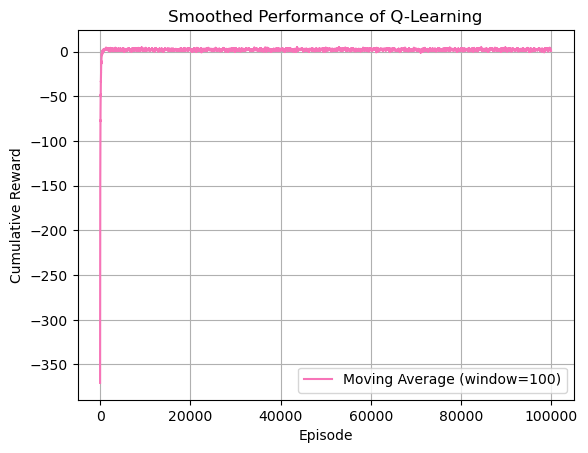

In [73]:
window_size = 100
moving_avg = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')

plt.plot(moving_avg, label="Moving Average (window=100)",color="#f774b8")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Smoothed Performance of Q-Learning")
plt.legend()
plt.grid()

plt.show()

<a id="evaluation"></a>
# <p style="background-color:#f774b8; font-family:calibri; font-size:130%; color:black; text-align:center; border-radius:40px 50px; padding:10px">Step 5: Evaluating the Agent's Actions in the Environment</p>

⬆️ [Table of Contents](#contents_table)

In this step, we will evaluate the performance of our trained agent by observing its actions in the environment. The agent will be tasked with navigating through the environment while we visualize its movements and actions in real-time.

### **Agent in Action**
The following visualization shows the environment at each step as the agent selects actions based on its Q-table and interacts with the environment.

1. **Environment Setup**: The environment is initialized, and the agent's actions are determined based on the learned Q-table.
2. **Action Selection**: The agent chooses the optimal action for each state using the Q-values.
3. **Real-time Visualization**: As the agent performs actions, the environment is updated, and the agent's state transitions are displayed on the plot.

Starting evaluation...


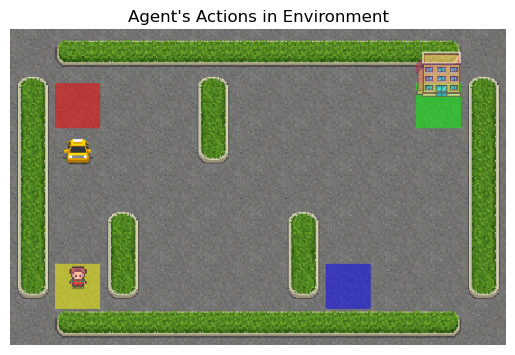

State: 9, Action: 0, Reward: -1


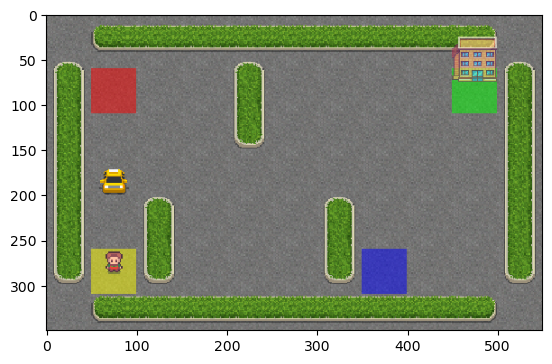

State: 109, Action: 0, Reward: -1


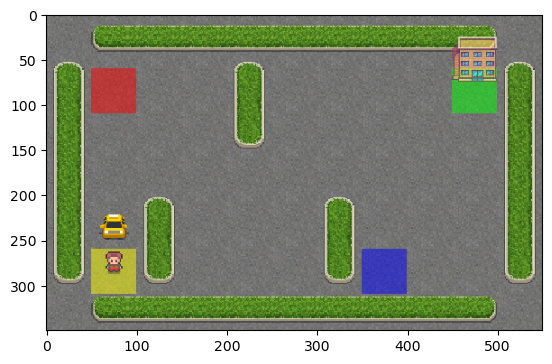

State: 209, Action: 0, Reward: -1


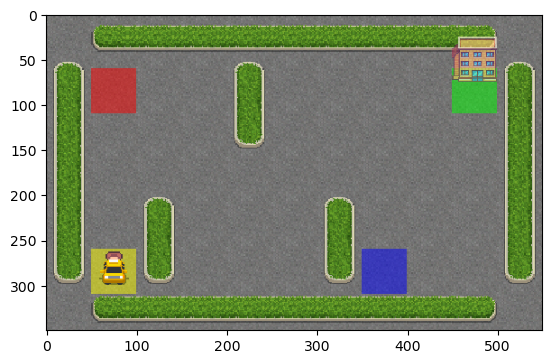

State: 309, Action: 0, Reward: -1


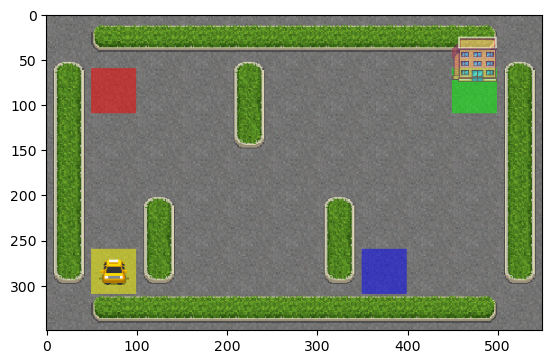

State: 409, Action: 4, Reward: -1


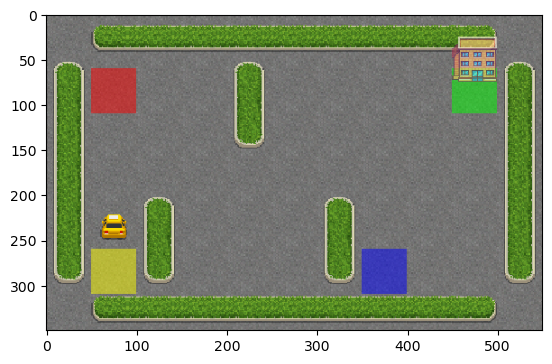

State: 417, Action: 1, Reward: -1


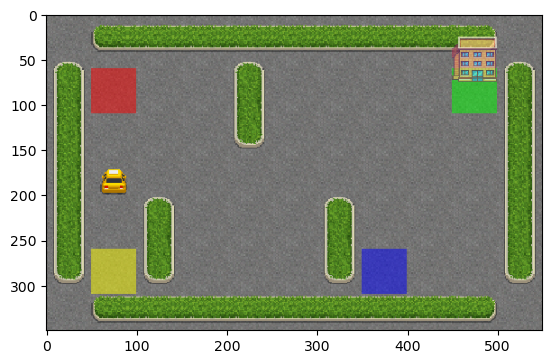

State: 317, Action: 1, Reward: -1


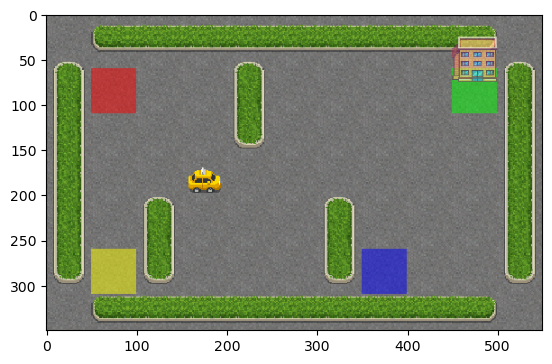

State: 217, Action: 2, Reward: -1


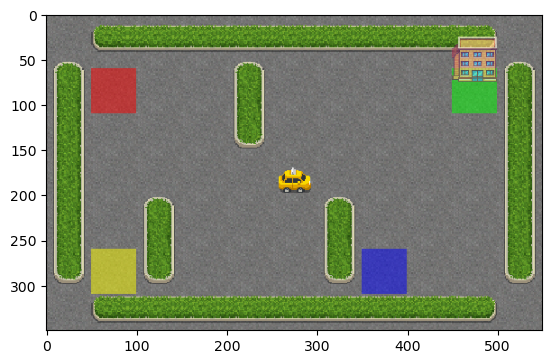

State: 237, Action: 2, Reward: -1


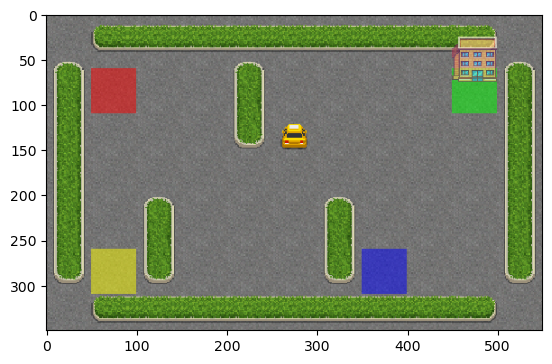

State: 257, Action: 1, Reward: -1


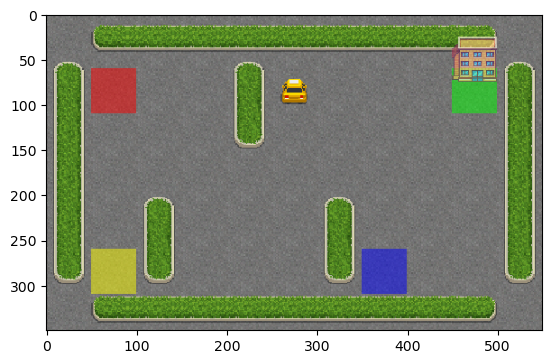

State: 157, Action: 1, Reward: -1


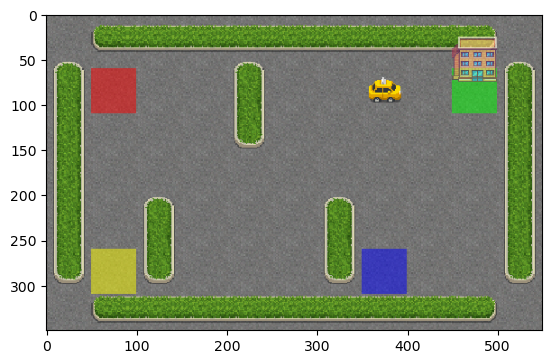

State: 57, Action: 2, Reward: -1


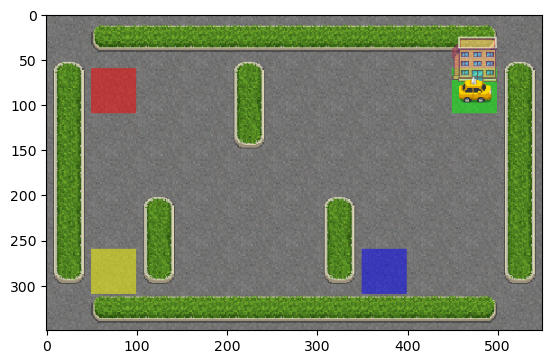

State: 77, Action: 2, Reward: -1


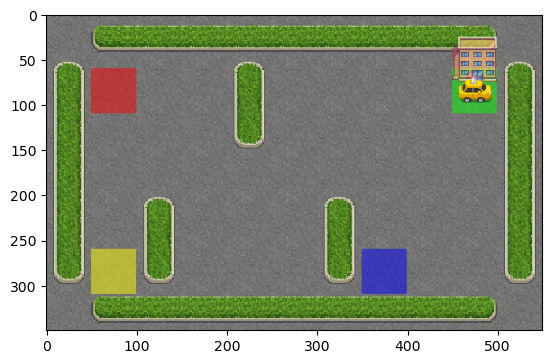

State: 97, Action: 5, Reward: 20
Total Reward in this episode: 7


In [74]:
state = environment.reset()
if isinstance(state, tuple):  
    state = state[0]

terminated = False
total_reward = 0

plt.ion()   
fig, ax = plt.subplots()
img = plt.imshow(environment.render()) 
plt.title("Agent's Actions in Environment")
plt.axis('off')

print("Starting evaluation...")

while not terminated:
    action = np.argmax(q_table[state])

    next_state, reward, terminated, truncated, info = environment.step(action)

    if isinstance(next_state, tuple):
        next_state = next_state[0]

    total_reward += reward

    img = plt.imshow(environment.render()) 
    plt.draw()
    plt.pause(0.5)

    print(f"State: {state}, Action: {action}, Reward: {reward}")

    state = next_state

plt.ioff() 
plt.show()

print(f"Total Reward in this episode: {total_reward}")
environment.close()

<div style="border-radius:10px; padding: 15px; background-color: #f774b8; font-size:110%; text-align:left">

* **Thank you for taking the time to consider this matter**
* The programmer of this project: **Amir Salmasi**

<h2 align="left"><font color='black'>Best Regards🙏</font></h2>